# Project Name: HR Analytics (Employee Attrition)

The objective of this project is to find the reason/factors leading to employee attrition. 


##  Life Cycle of the Project:
    1.Data Analysis
    2.Feature Engineering
    3.Feature Selection
    4.Model Building
    5.Model Deployment

## Pre - Modelling (Exploratory Data Analysis)

In [138]:
# Data Analysis Phase

# Importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [139]:
# Display all the rows of the dataframe
#pd.pandas.set_option('display.max_rows',None)

#### Reading the data

In [224]:
# Reading the data
general = pd.read_csv('D:/Business Analytics/PYTHON/Projects/HR Analytics/general_data.csv', sep=',')
emp_survry = pd.read_csv('D:/Business Analytics/PYTHON/Projects/HR Analytics/employee_survey_data.csv', sep=',')
emp_perform = pd.read_csv('D:/Business Analytics/PYTHON/Projects/HR Analytics/manager_survey_data.csv', sep=',')

In [225]:
# Merging the data into one complete dataset
df = pd.merge(general,emp_survry,on='EmployeeID', how='left')
data = pd.merge(df,emp_perform,on='EmployeeID', how='left')

#### Number of rows and columns

In [226]:
#Number of rows and columns in the data
data.shape

(4410, 29)

In [227]:
# Top 5 records
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


#### Data Type Checks

In [228]:
# Converting ordinal variables datatype
ordinal_feature = ['JobSatisfaction','Education','JobLevel','StockOptionLevel','EnvironmentSatisfaction','WorkLifeBalance', 'JobInvolvement','PerformanceRating']

for feature in ordinal_feature:
    data[feature] = data[feature].astype(str)


#### Duplicate Values

In [229]:
# Checking for the duplicate records
data.duplicated().sum()

# There is no duplicate record in the data

0

#### Number of categories

In [230]:
# Checking for number of category of discrete and categorical variables
dis_cat_feature =[feature for feature in data.columns if len(data[feature].unique())<25]

for feature in dis_cat_feature:
    unique = len(data[feature].unique())
    print(feature,'-',unique)

Attrition - 2
BusinessTravel - 3
Department - 3
Education - 5
EducationField - 6
EmployeeCount - 1
Gender - 2
JobLevel - 5
JobRole - 9
MaritalStatus - 3
NumCompaniesWorked - 11
Over18 - 1
PercentSalaryHike - 15
StandardHours - 1
StockOptionLevel - 4
TrainingTimesLastYear - 7
YearsSinceLastPromotion - 16
YearsWithCurrManager - 18
EnvironmentSatisfaction - 5
JobSatisfaction - 5
WorkLifeBalance - 5
JobInvolvement - 4
PerformanceRating - 2


As we can observe that there are few variables like **EmployeeCount, Over18, StandardHours** that have only one unique value. These variables cannot generate useful value for the data.

In [231]:
# Removing Variables which does not generate value
data.drop(columns = ['EmployeeCount','Over18','StandardHours','EmployeeID'], inplace=True)

## In Data Analysis we will analyse the following:
    1.Missing Values
    2.All the numerical and categorical variable
    3.Cardinality of categorical variable
    4.Outliers
    5.Relationship between independent and dependent feature(Sale Price)

### Missing Values

In [232]:
# Here we will check the missing values in each columns
feature_with_na = [feature for feature in data.columns if data[feature].isnull().sum()>0 ]

# Printing the Feature name and missing percentage
for feature in feature_with_na:
    print(feature,':',np.round(data[feature].isnull().mean(),4),'%')
    
     

NumCompaniesWorked : 0.0043 %
TotalWorkingYears : 0.002 %


As we can see that there are few features with very small percentage of missing values.

### Visualizing Attrition

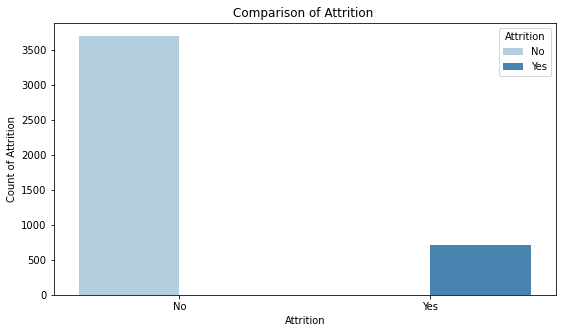

In [233]:
# Attrition Count
df=data.groupby(by='Attrition')['Attrition'].count()

# Count PLot
plt.figure(figsize=(9,5))
sns.countplot(x='Attrition',data=data, palette='Blues',hue='Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count of Attrition')
plt.title('Comparison of Attrition ')
plt.show()

#### Percentage of attrition

In [234]:
# Attrition percentage in the dataset
att_pcent = len(data.Attrition[data.Attrition=='Yes'])/len(data)*100
print('Percentagr of Attrition: ',np.round(att_pcent,2),'%')

Percentagr of Attrition:  16.12 %


#### Number of numerical features

In [235]:
# List of continuous Variable
numerical_feature = [feature for feature in data.columns if data[feature].dtype!='O']

# No. of Numerical features
print('Number of Numerical Feature:',len(numerical_feature))

# Numerical Data
data[numerical_feature].head()

Number of Numerical Feature: 10


,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,6,131160,1.0,11,1.0,6,1,0,0
1,31,10,41890,0.0,23,6.0,3,5,1,4
2,32,17,193280,1.0,15,5.0,2,5,0,3
3,38,2,83210,3.0,11,13.0,5,8,7,5
4,32,10,23420,4.0,12,9.0,2,6,0,4


In [236]:
# Continuous features
continuous_feature = [feature for feature in data.columns.difference(['EmployeeID']) if len(data[feature].unique())>25]

#### Summary of continuous feature

In [237]:
def var_summary(x):
    return pd.Series([x.median(),x.mean(),x.std(),x.var(),x.std()/x.mean(),x.min(),x.dropna().quantile(0.01),x.dropna().quantile(0.05),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),x.dropna().quantile(0.95),x.dropna().quantile(0.99),x.max()],
                    index=['Median','Mean','Std','Var','CV','Min','P1','P5','Q1','Q2','Q3','P95','P99','Max'])

num_summary = data[continuous_feature].apply(var_summary).T

# Exploring numerical Variable
num_summary

,Median,Mean,Std,Var,CV,Min,P1,P5,Q1,Q2,Q3,P95,P99,Max
Age,36.0,36.923810,9.133301,8.341719e+01,0.247355,18.0,19.0,24.0,30.0,36.0,43.0,54.0,58.91,60.0
DistanceFromHome,7.0,9.192517,8.105026,6.569144e+01,0.881698,1.0,1.0,1.0,2.0,7.0,14.0,26.0,29.00,29.0
MonthlyIncome,49190.0,65029.312925,47068.888559,2.215480e+09,0.723810,10090.0,13620.6,20970.0,29110.0,49190.0,83800.0,178560.0,196269.10,199990.0
TotalWorkingYears,10.0,11.279936,7.782222,6.056298e+01,0.689917,0.0,1.0,1.0,6.0,10.0,15.0,28.0,35.00,40.0
YearsAtCompany,5.0,7.008163,6.125135,3.751728e+01,0.874000,0.0,0.0,1.0,3.0,5.0,9.0,20.0,31.00,40.0


#### Distribution of continuous features

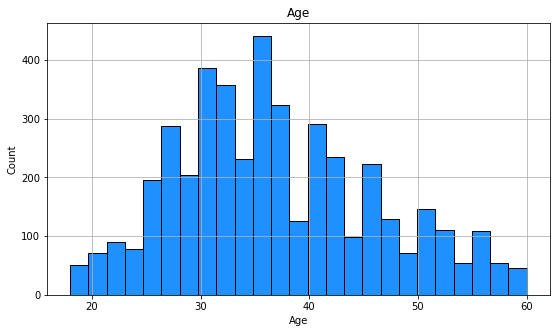

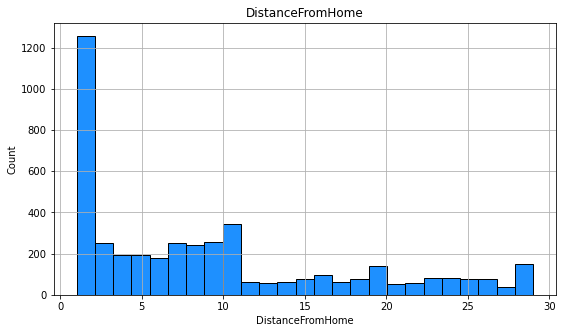

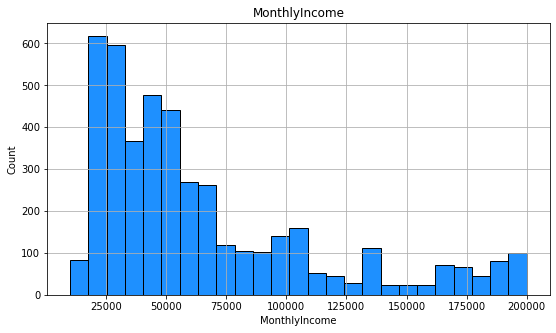

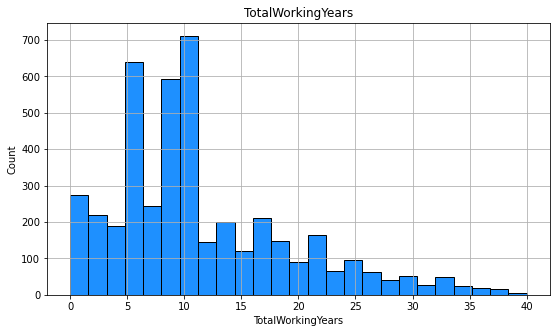

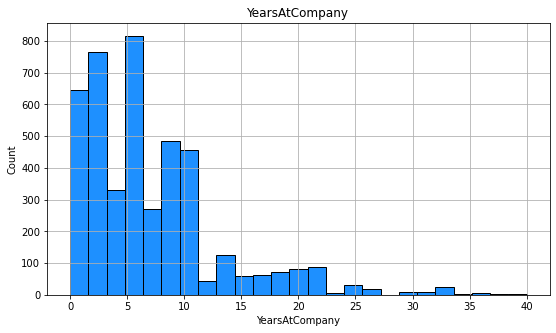

In [238]:
# Distribution of the continuous feature
for feature in continuous_feature:
    dataset = data.copy()
    plt.figure(figsize=(9,5))
    dataset[feature].hist(bins=25,ec='k',color="dodgerblue")
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Most of the feature in the above diagram are **skewed**

### Correlation of Numerical Variables

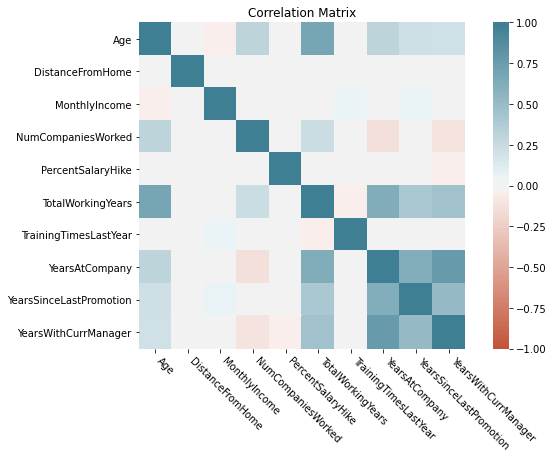

In [155]:
corr = dataset[numerical_feature].corr()
plt.figure(figsize=(10,6))
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=200),square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=-45,
    horizontalalignment='left'
);
plt.title('Correlation Matrix')
plt.show()

We can see that there is significant correlation amoung variables.

#### Attrition in discrete features

In [156]:
discrete_feature = [feature for feature in data.columns.difference(['EmployeeID','Attrition']) if len(data[feature].unique())<20 and data[feature].dtype!='O']

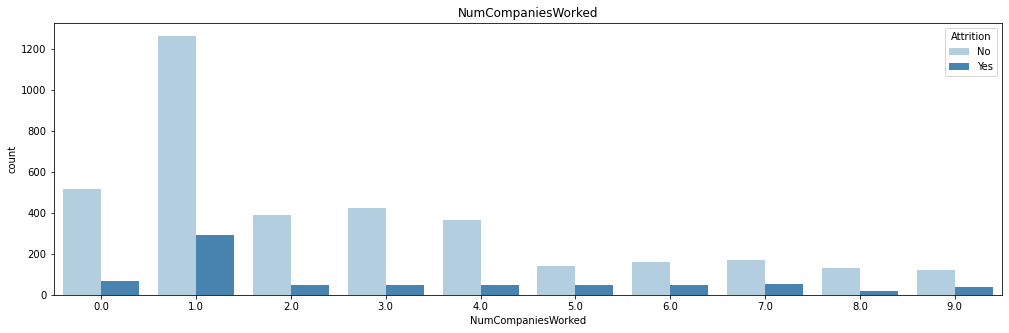

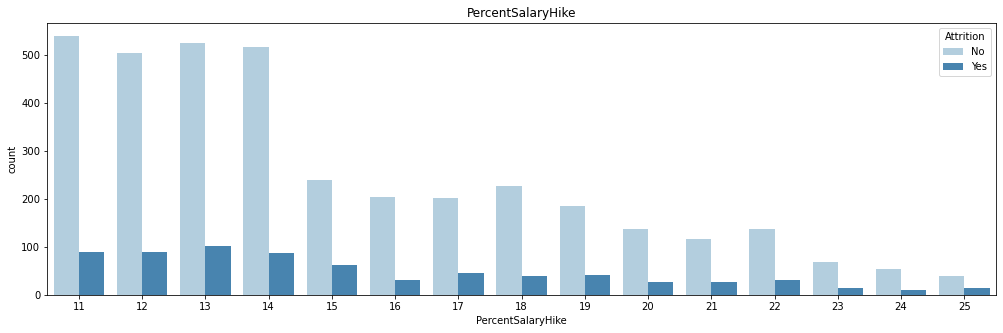

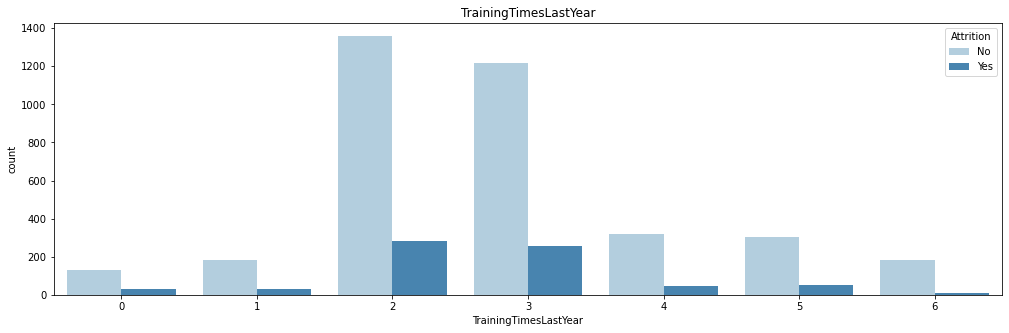

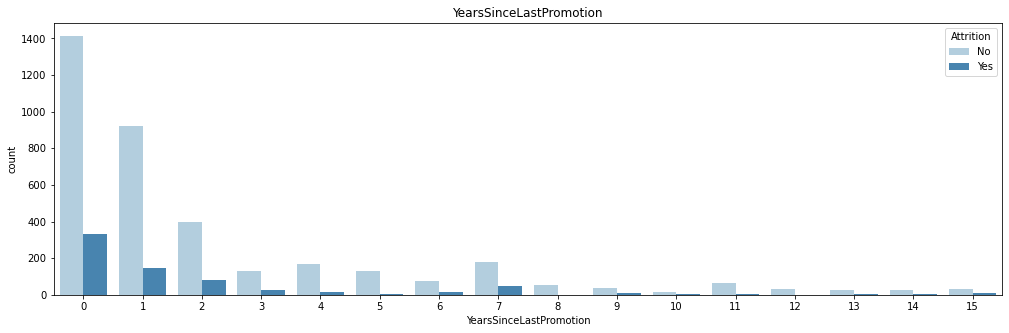

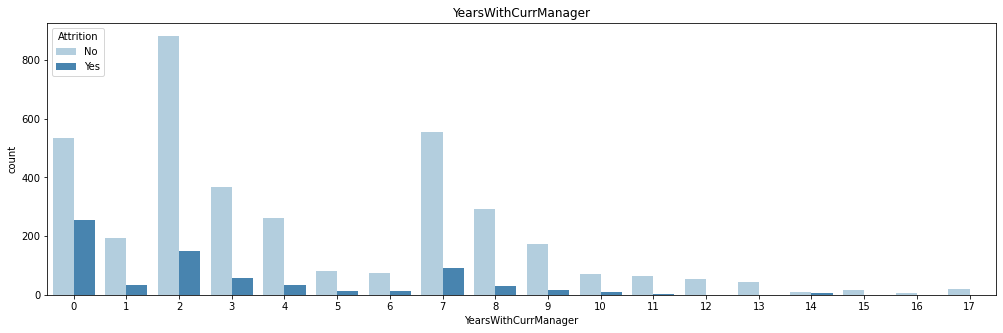

In [157]:
for feature in discrete_feature:
    dataset = data.copy()
    plt.figure(figsize=(17,5))
    sns.countplot(x=feature,hue='Attrition',data=dataset,palette='Blues')
    plt.title(feature)
    plt.show()

#### Attrition in categorical features

In [158]:
categorical_feature = [feature for feature in data.columns.difference(['EmployeeID','Attrition']) if data[feature].dtype=='O']

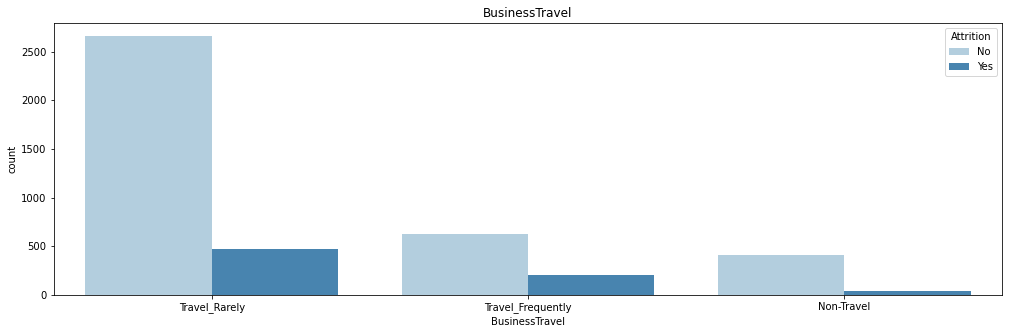

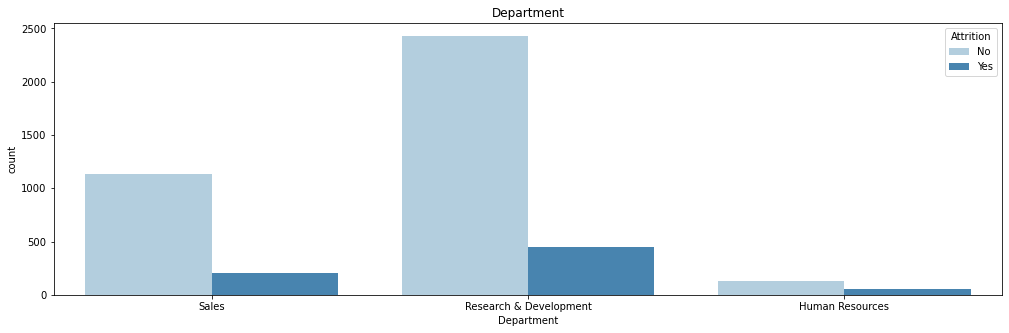

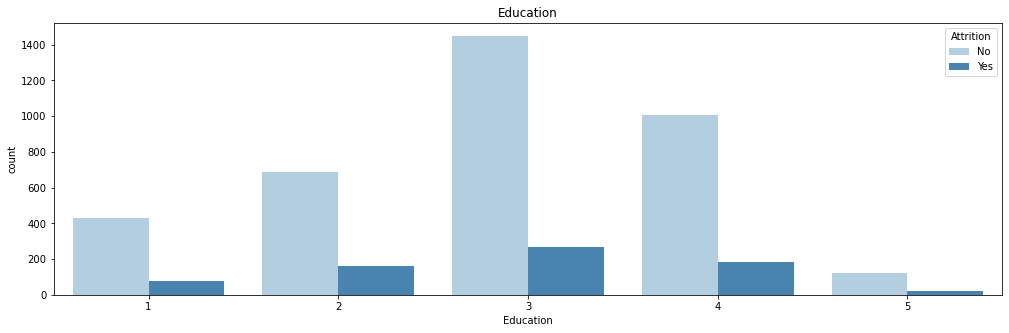

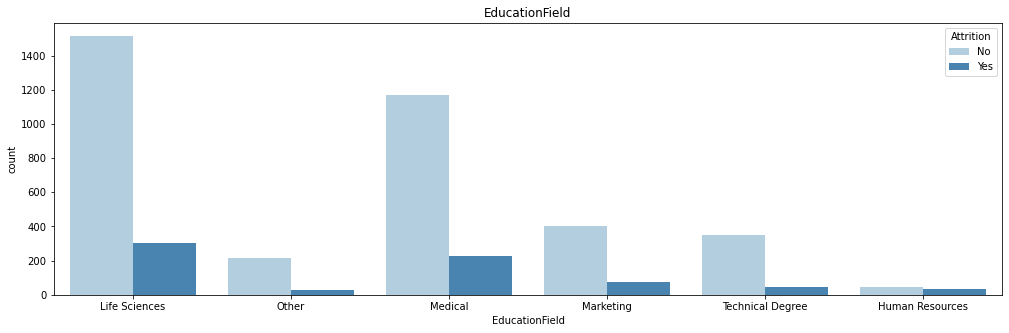

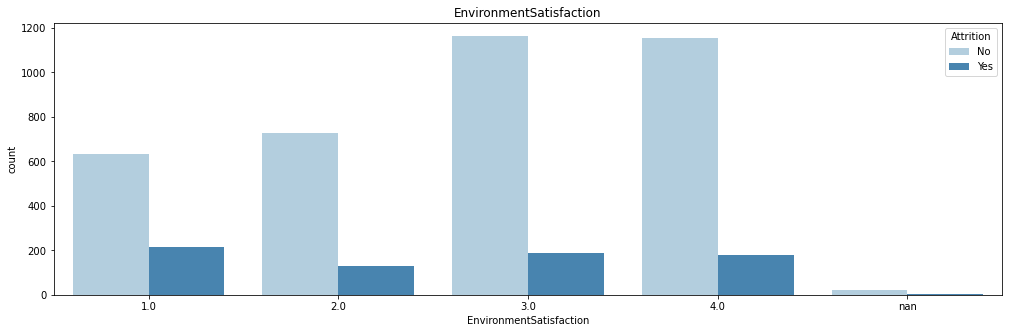

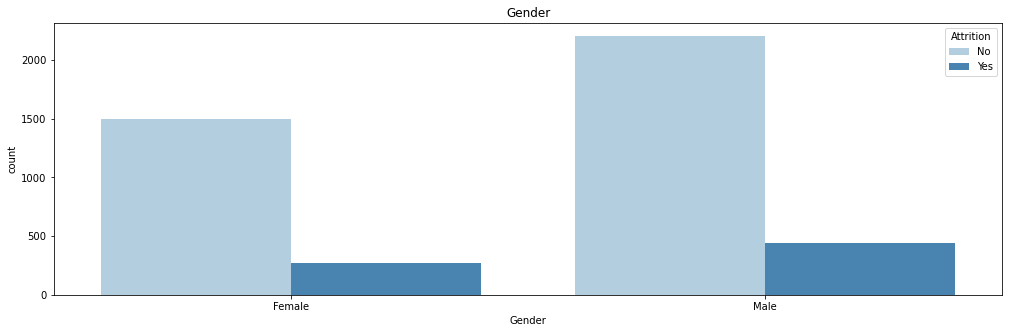

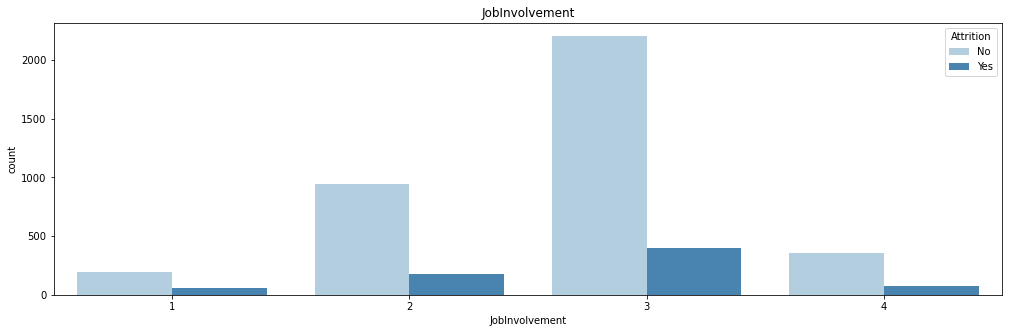

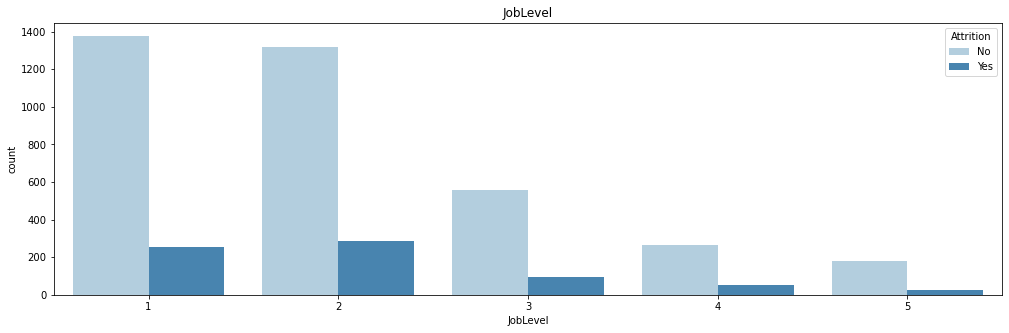

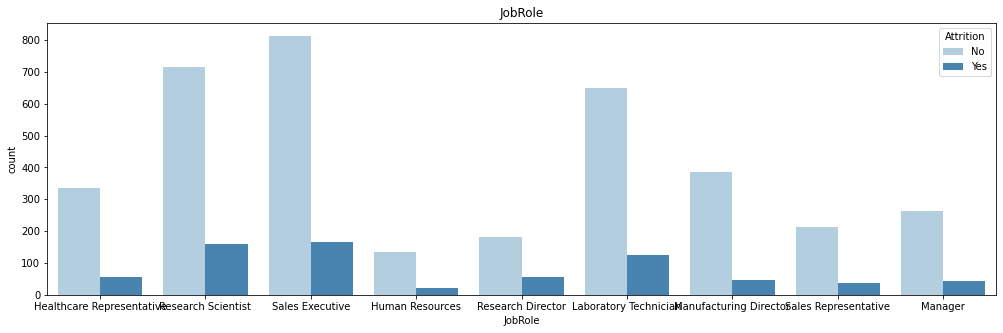

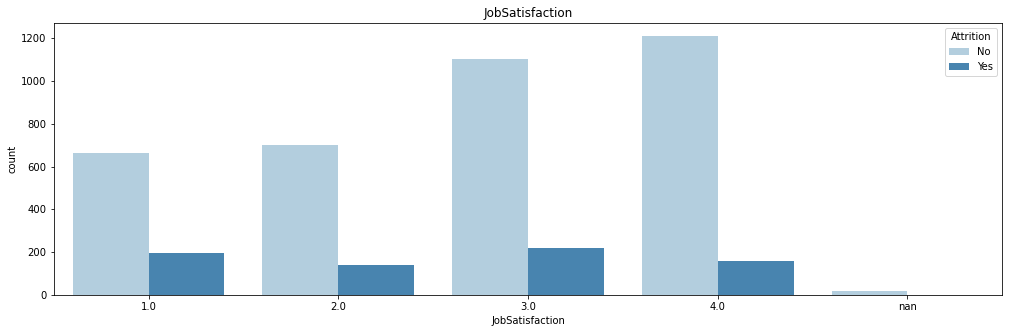

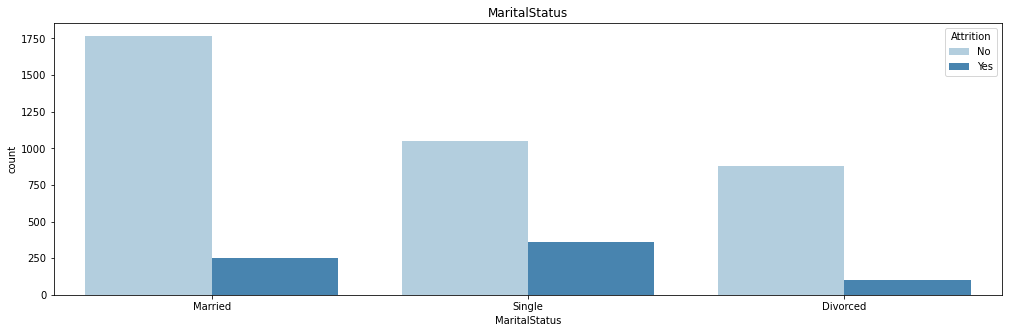

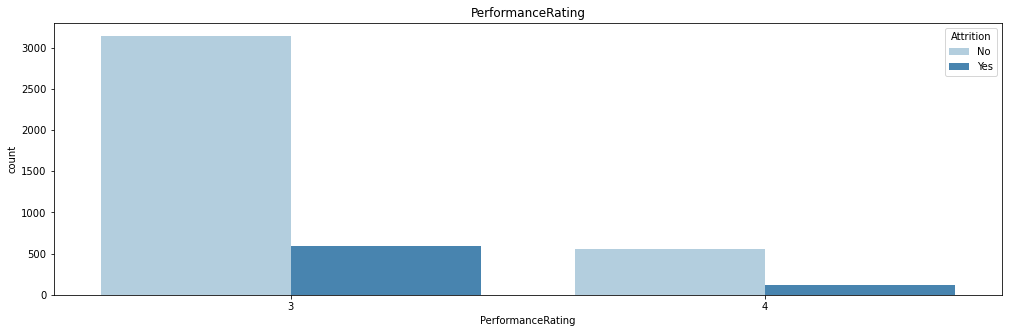

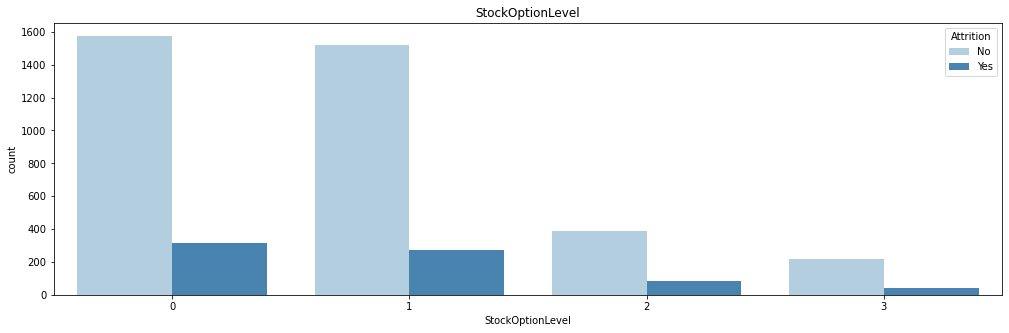

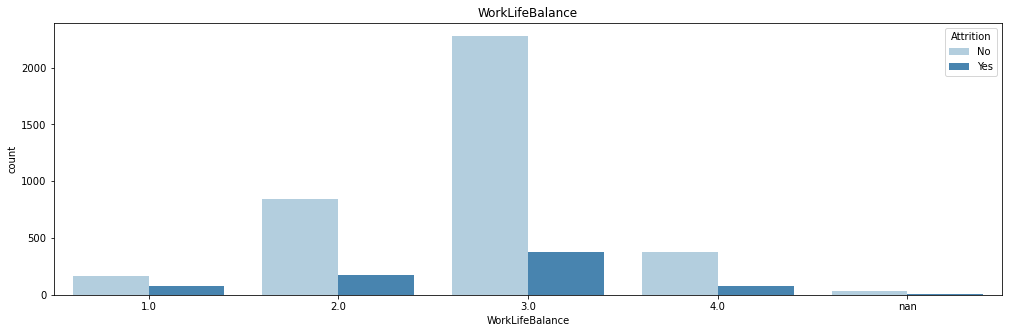

In [159]:
for feature in categorical_feature:
    dataset = data.copy()
    plt.figure(figsize=(17,5))
    sns.countplot(x=feature,hue='Attrition',data=dataset,palette = "Blues")
    plt.title(feature)
    plt.show()

### Outliers

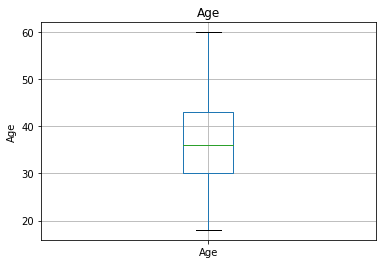

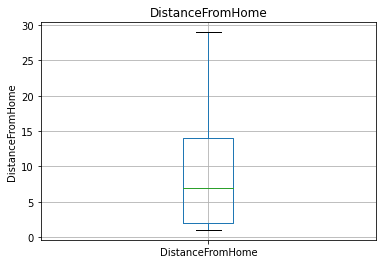

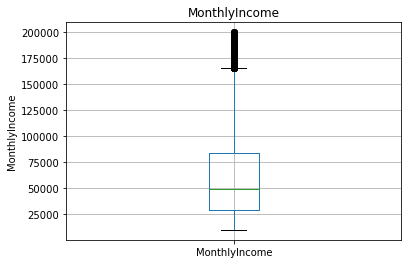

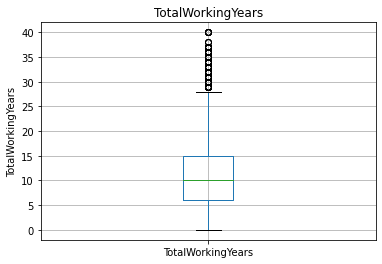

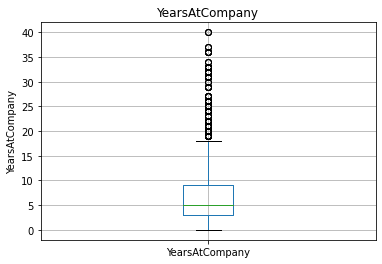

In [160]:
for feature in continuous_feature:
    dataset = data.copy()
    #dataset[feature] = np.log(dataset[feature])
    dataset.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

We can observe that there are few outliers in some variables 

# Modelling

## Feature Engineering

In [161]:
# Replacing Attrition with 1 else 0
data['Attrition'] = np.where(data.Attrition=='Yes',1,0)

### Missing Values

In [162]:
# For Numerical Variables
def miss_treat(x):
    x = x.fillna(x.median())
    return x

data[feature_with_na] = dataset[feature_with_na].apply(lambda x: miss_treat(x))
data[feature_with_na].isnull().sum()

NumCompaniesWorked    0
TotalWorkingYears     0
dtype: int64

In [163]:
# For Categorical Variables
for feature in ['JobSatisfaction','EnvironmentSatisfaction','WorkLifeBalance']:
    mode = data[feature].mode()[0]
    data[feature].replace('nan',str(mode),inplace=True)

### Outliers 

In [164]:
def outliers_treat(x):
    x = x.clip(upper=x.quantile(0.95))
    x = x.clip(lower=x.quantile(0.05))
    return x

data[continuous_feature] = data[continuous_feature].apply(lambda x: outliers_treat(x))

### Checking for the Significance of Numerical Variables
We will check the significance through **Weight of Evidence**

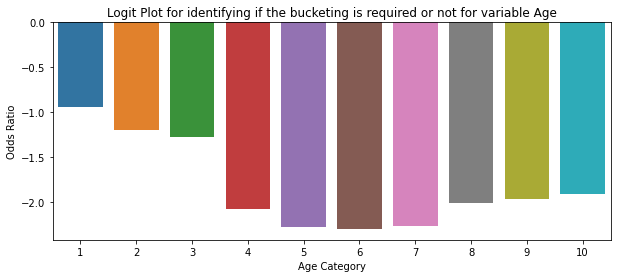

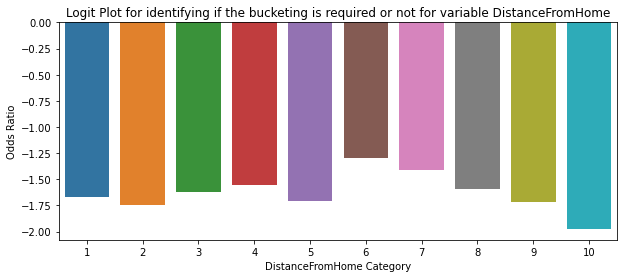

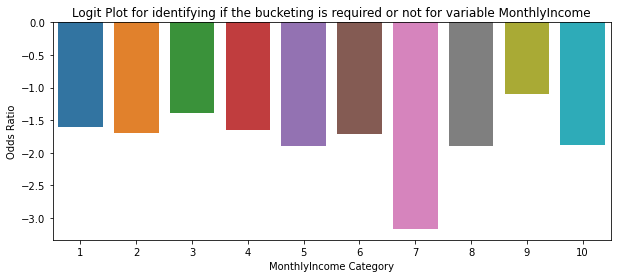

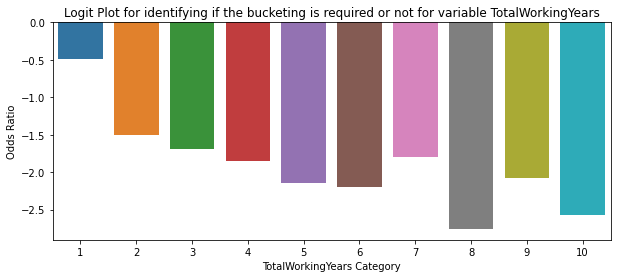

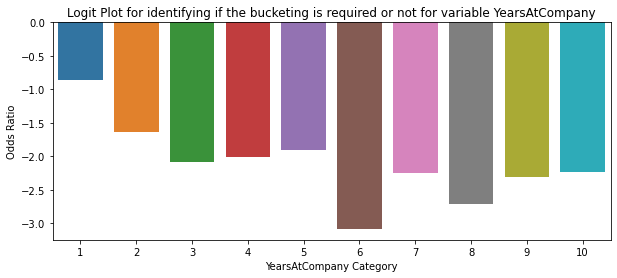

In [165]:


for feature in continuous_feature:
    binned = pd.cut(data[feature],bins=10,labels=list(range(1,11)))
    odds = data.groupby(binned)['Attrition'].sum()/(data.groupby(binned)['Attrition'].count()-data.groupby(binned)['Attrition'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize = (10,4))
    sns.barplot(x=log_odds.index, y= log_odds)
    plt.ylabel('Odds Ratio')
    plt.xlabel(str(feature)+str(' Category'))
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(feature))

In [166]:
dis_cat_feature = categorical_feature + discrete_feature

In [167]:
data[discrete_feature].head()

,NumCompaniesWorked,PercentSalaryHike,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager
0,1.0,11,6,0,0
1,0.0,23,3,1,4
2,1.0,15,2,0,3
3,3.0,11,5,7,5
4,4.0,12,2,0,4


### Checking for the Significance of Categorical Variables
We will check the significance through **Weight of Evidence**

C:\Users\Sufiyan Laptop\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


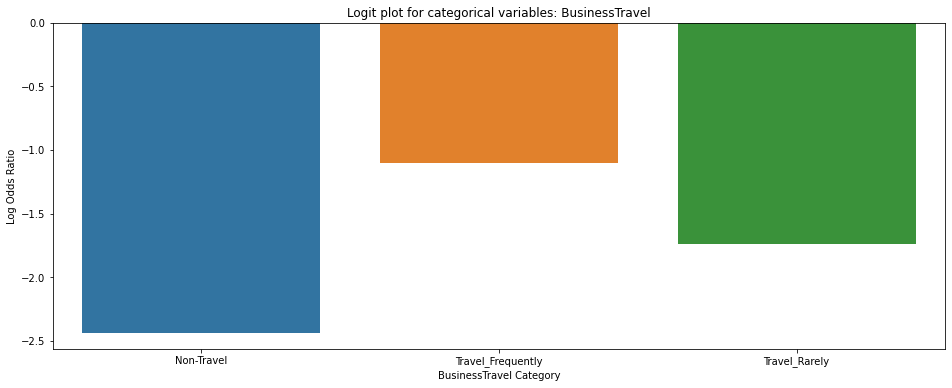

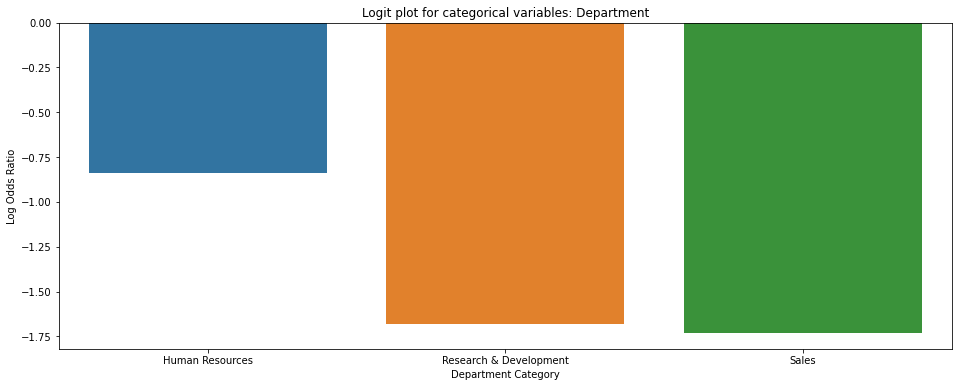

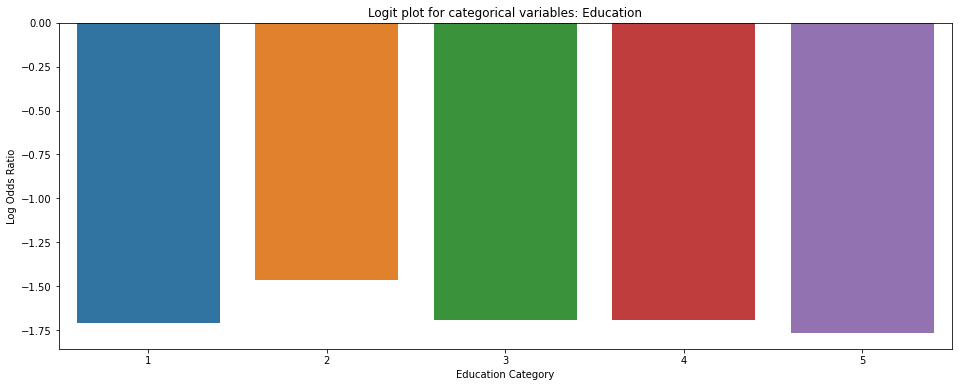

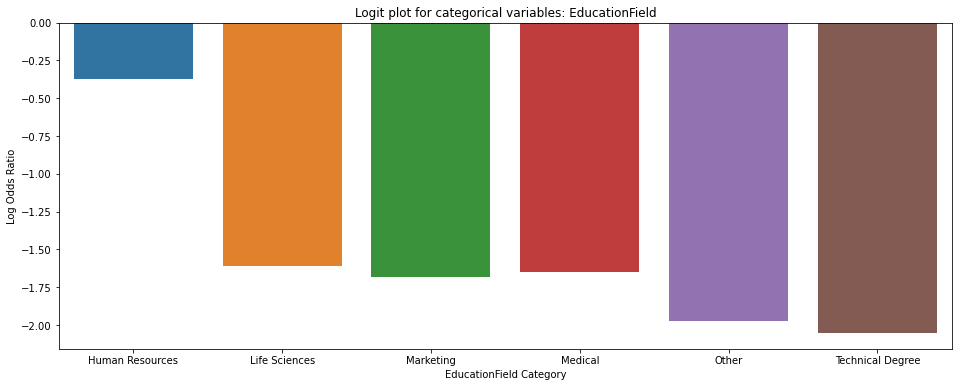

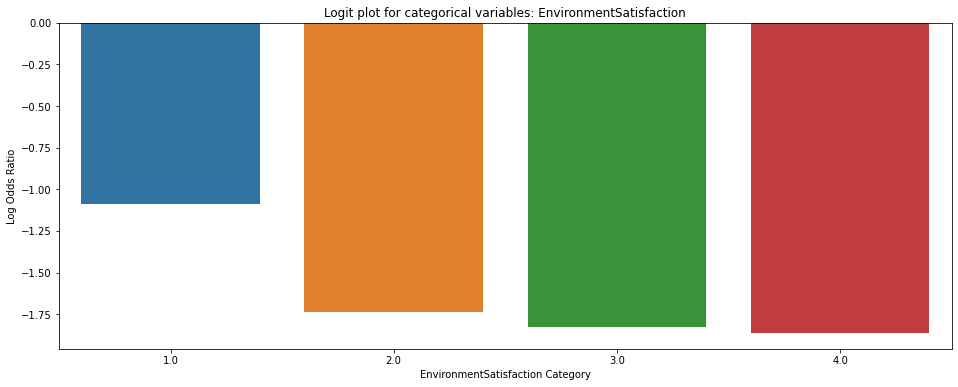

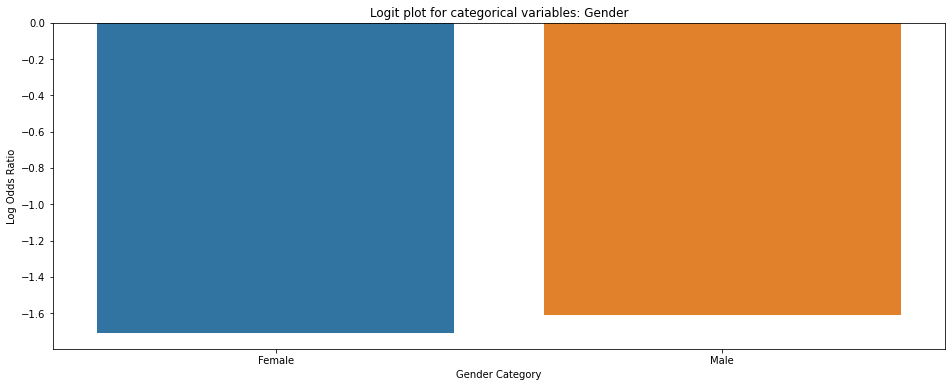

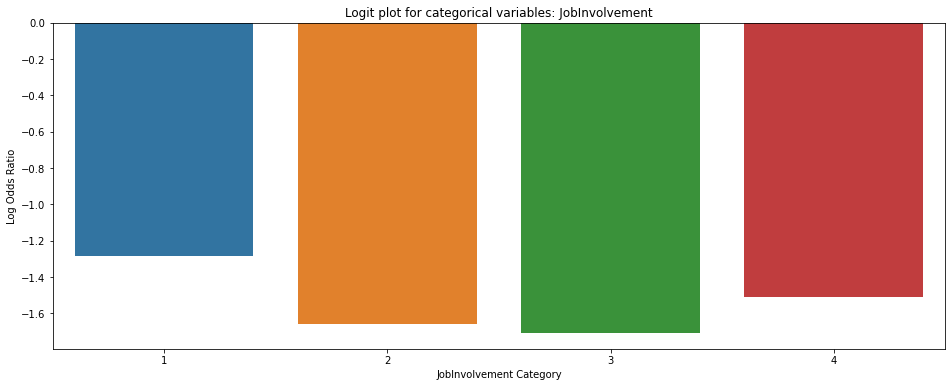

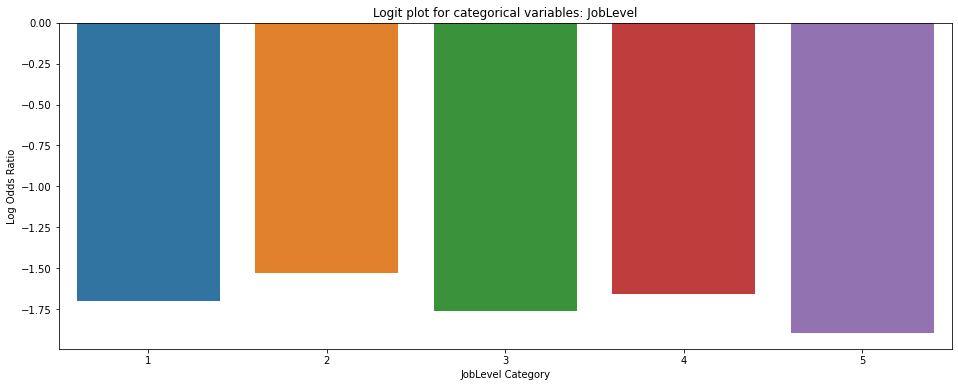

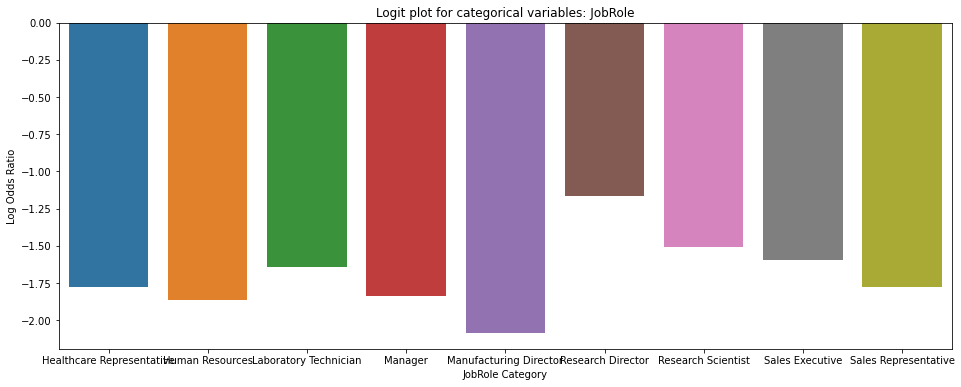

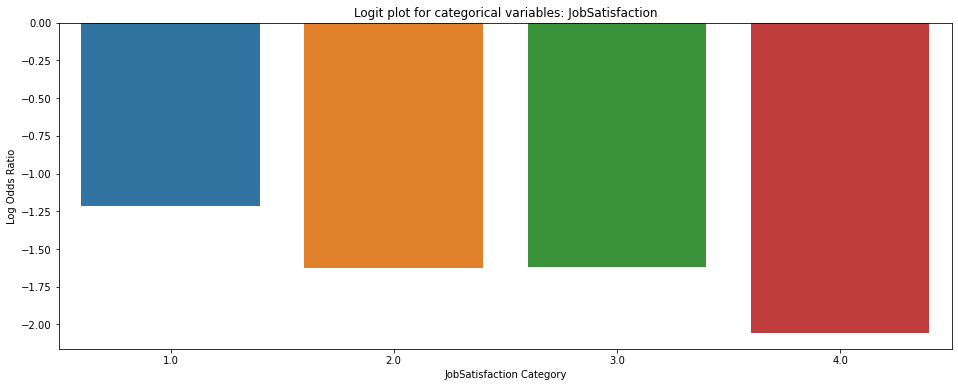

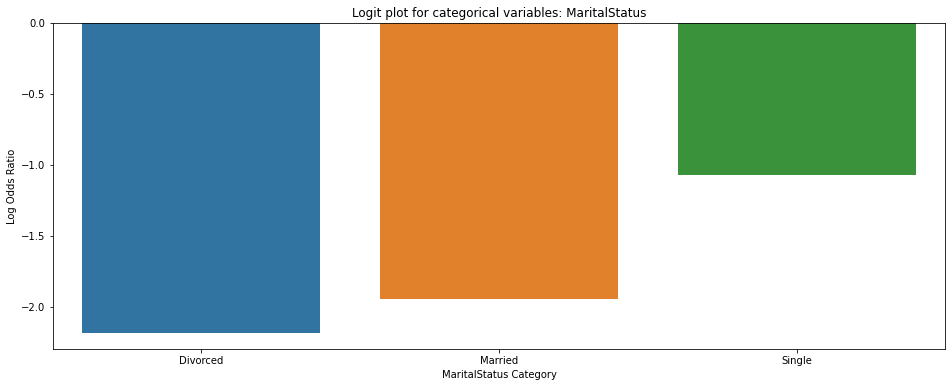

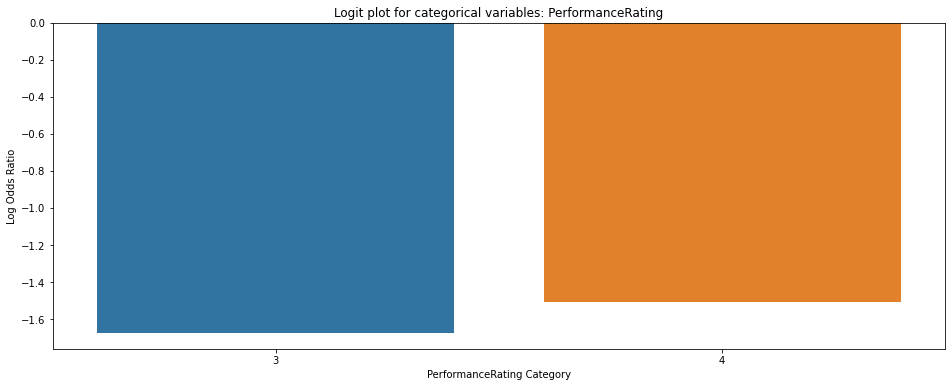

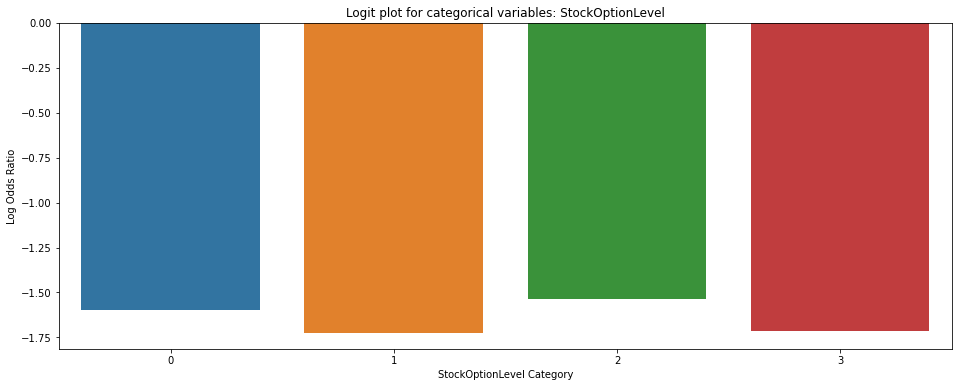

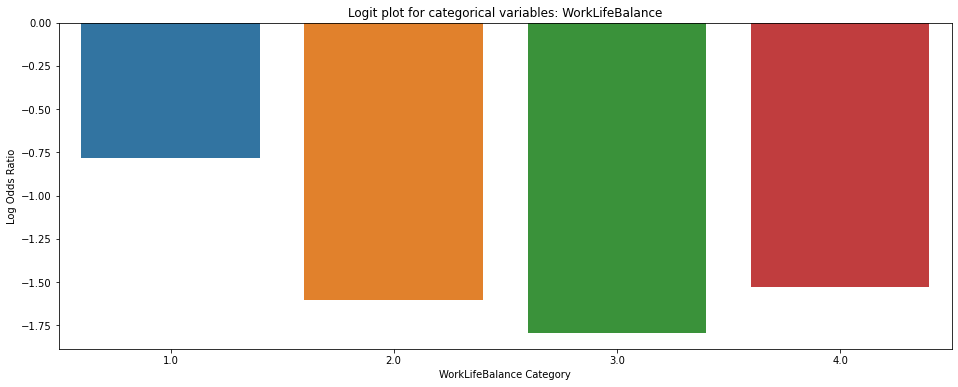

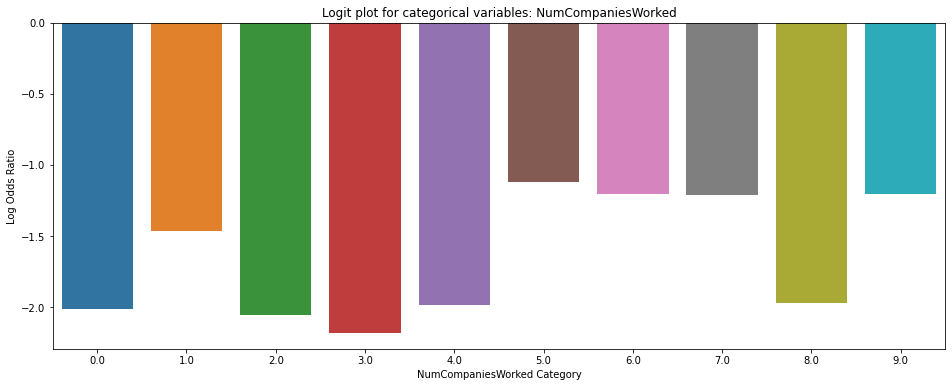

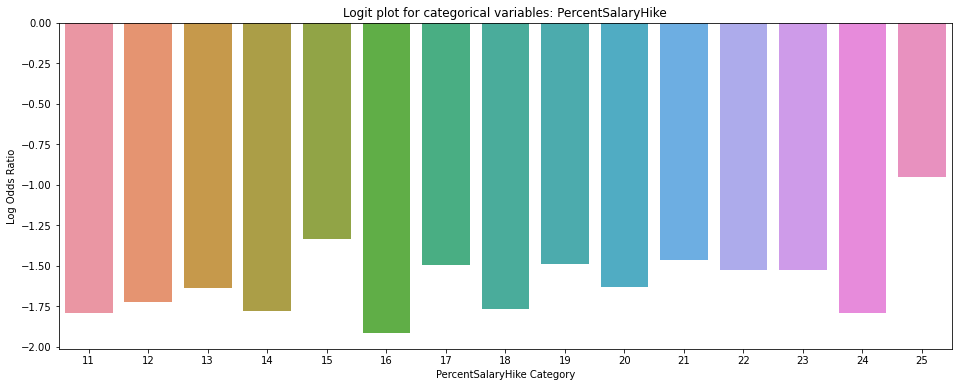

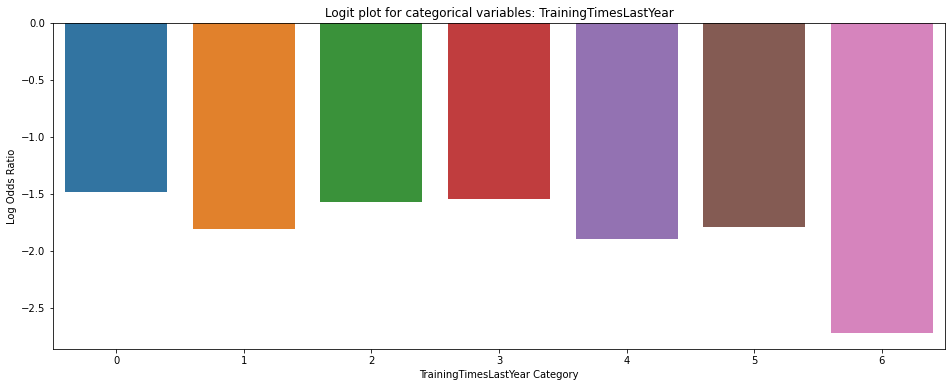

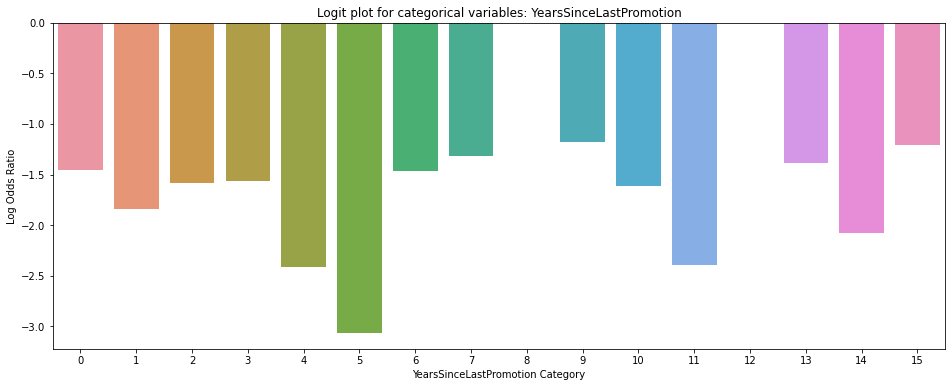

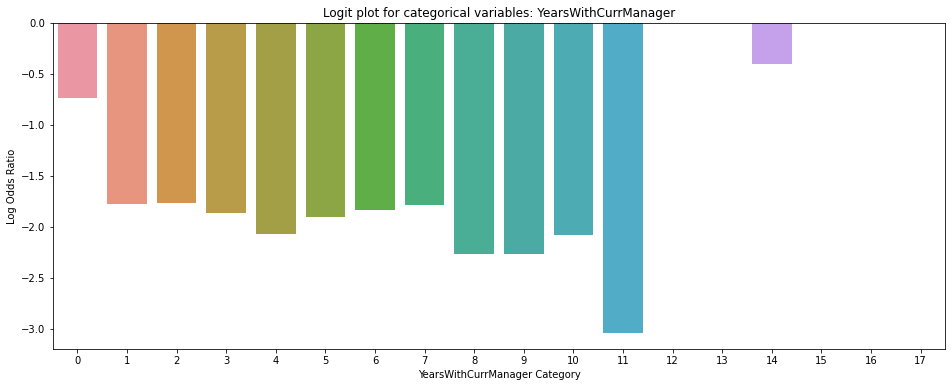

In [168]:
for feature in dis_cat_feature:
    odds = data.groupby(feature)['Attrition'].sum()/(data.groupby(feature)['Attrition'].count()-data.groupby(feature)['Attrition'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(16,6))
    sns.barplot(x=log_odds.index, y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.xlabel(str(feature)+str(' Category'))
    plt.title(str('Logit plot for categorical variables: ') + str(feature))

### Reducing variables based on WoE
We need to drop some variables which does not generate value and are insignificant.

In [169]:
# Variables to be dropped
data.drop(columns=['PerformanceRating','Gender','JobLevel','Education','StockOptionLevel','JobRole'], inplace=True)

### Grouping Continuous based on WoE

In [170]:
# Continuous Variables
for feature in ['Age','TotalWorkingYears','YearsAtCompany']:
    data[feature] = pd.cut(data[feature], bins=10,labels= list(range(1,11)))
    data[feature] = data[feature].astype(int).astype(str)

In [171]:
# Grouping countinuous variables into categories
data['Age'] = data['Age'].map({'1':'Low','2':'Low','3':'Low','4':'Avg','5':'Avg','6':'Avg','7':'High','8':'High','9':'High','10':'High'})
data['TotalWorkingYears'] = data['TotalWorkingYears'].map({'1':'Low','2':'Below_Avg','3':'Below_Avg','4':'Below_Avg','5':'Avg','6':'Avg','7':'Avg','8':'High','9':'High','10':'High'}) 
data['YearsAtCompany'] = data['YearsAtCompany'].map({'1':'Low','2':'Below_Avg','3':'Below_Avg','4':'Below_Avg','5':'Below_Avg','6':'Avg','7':'High','8':'High','9':'High','10':'High'}) 

### Grouping Discrete Variable based on WoE

In [172]:
# Discrete Variables
for feature in ['NumCompaniesWorked','TrainingTimesLastYear']:
    data[feature] = data[feature].astype(int).astype(str)

In [173]:
# Grouping Discrete variables into categories
data['NumCompaniesWorked'] = data.NumCompaniesWorked.map({'0':'Very_Low','1':'Low','2':'Below_Avg','3':'Below_Avg','4':'Below_Avg','5':'Avg','6':'Avg','7':'Avg','8':'High','9':'Very_High'})
data['TrainingTimesLastYear'] = data.TrainingTimesLastYear.map({'0':'Low','1':'Low','2':'Low','3':'Low','4':'Low','5':'Low','6':'High'})  

In [174]:
def group_var(x):
    if (x==0):
        val = 1
    elif (x>0)&(x<11):
        val=2
    elif (x==11):
        val=3
    else:
        val=4
    return val

In [175]:
data['YearsWithCurrManager'] = data.YearsWithCurrManager.apply(group_var)

### Grouping Categorical Variable based on WoE

In [176]:
# Grouping Categorical variables 
data['Department'] = data.Department.map({'Human Resources':'HR','Research & Development':'RnD_Sales','Sales':'RnD_Sales'})
data['EducationField'] = data.EducationField.map({'Human Resources':'HR','Life Sciences':'LS_M_M', 'Medical':'LS_M_M', 'Marketing':'LS_M_M','Technical Degree':'oth_TD','Other':'oth_TD'})
data['MaritalStatus'] = data.MaritalStatus.map({'Married':'Married_Once','Divorced':'Married_Once','Single':'Single'})


### Encoding Categorical Variables

In [177]:
# Ordinal Encoding
data['BusinessTravel'] = data.BusinessTravel.map({'Non-Travel':1,'Travel_Rarely':2,'Travel_Frequently':3})

In [178]:
# One-Hot Encoding Encoding
dummies_col = ['Age','YearsAtCompany','TotalWorkingYears','Department','EducationField','TrainingTimesLastYear','YearsWithCurrManager','MaritalStatus','NumCompaniesWorked']

In [179]:
data = pd.get_dummies(columns=dummies_col, data = data, drop_first=True)

In [180]:
for feature in data.columns.difference(['Attrition']):
    data[feature] = data[feature].astype(float)
  

### Variable Reduction using Somers' D
We will reduce the variables through **univariate analysis**. We will calculate **probability** through logistic regression and then calculate metrics based on the probability. Here we will calculate **Somers' D**.

In [181]:
import statsmodels.formula.api as sm

In [182]:
from sklearn import metrics

In [183]:
sommerd_df = pd.DataFrame()
for feature in data.columns.difference(['Attrition']):
    log_reg = sm.logit(formula=str('Attrition~')+str(feature), data=data)
    result = log_reg.fit()
    y_score = pd.DataFrame(result.predict())
    y_score.columns = ['Score']
    sommers_d = 2*metrics.roc_auc_score(data['Attrition'],y_score)-1
    temp = pd.DataFrame([feature,sommers_d]).T
    temp.columns = ['Feature Name','SommersD']
    sommerd_df = pd.concat([sommerd_df,temp], axis=0)

Optimization terminated successfully.
         Current function value: 0.438924
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.425233
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.433625
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.438941
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.441643
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.441591
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.440363
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.436600
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.441574
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.436360
  

We will select features with high **Somers' D**

In [184]:
sd_values = sommerd_df.sort_values(by='SommersD', ascending=False)
sd_values.head()

,Feature Name,SommersD
0,Age_Low,0.243761
0,YearsAtCompany_Low,0.235733
0,MaritalStatus_Single,0.222469
0,TotalWorkingYears_Low,0.181691
0,YearsWithCurrManager_2,0.170173


### Variance Inflation Factor 
We will use vif to check for multicollinearity in the data.

In [185]:
from patsy import dmatrices

In [186]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [187]:
data.head()

,Attrition,BusinessTravel,DistanceFromHome,MonthlyIncome,PercentSalaryHike,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,Age_High,Age_Low,YearsAtCompany_Below_Avg,YearsAtCompany_High,YearsAtCompany_Low,TotalWorkingYears_Below_Avg,TotalWorkingYears_High,TotalWorkingYears_Low,Department_RnD_Sales,EducationField_LS_M_M,EducationField_oth_TD,TrainingTimesLastYear_Low,YearsWithCurrManager_2,YearsWithCurrManager_3,YearsWithCurrManager_4,MaritalStatus_Single,NumCompaniesWorked_Below_Avg,NumCompaniesWorked_High,NumCompaniesWorked_Low,NumCompaniesWorked_Very_High,NumCompaniesWorked_Very_Low
0,0,2.0,6.0,131160.0,11.0,0.0,3.0,4.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,3.0,10.0,41890.0,23.0,1.0,3.0,2.0,4.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,3.0,17.0,178560.0,15.0,0.0,2.0,2.0,1.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,1.0,2.0,83210.0,11.0,7.0,4.0,4.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,2.0,10.0,23420.0,12.0,0.0,4.0,1.0,3.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [188]:
x = pd.concat([data[data.columns.difference(['Attrition'])],data['Attrition']], axis=1)
x.head()

,Age_High,Age_Low,BusinessTravel,Department_RnD_Sales,DistanceFromHome,EducationField_LS_M_M,EducationField_oth_TD,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MaritalStatus_Single,MonthlyIncome,NumCompaniesWorked_Below_Avg,NumCompaniesWorked_High,NumCompaniesWorked_Low,NumCompaniesWorked_Very_High,NumCompaniesWorked_Very_Low,PercentSalaryHike,TotalWorkingYears_Below_Avg,TotalWorkingYears_High,TotalWorkingYears_Low,TrainingTimesLastYear_Low,WorkLifeBalance,YearsAtCompany_Below_Avg,YearsAtCompany_High,YearsAtCompany_Low,YearsSinceLastPromotion,YearsWithCurrManager_2,YearsWithCurrManager_3,YearsWithCurrManager_4,Attrition
0,1.0,0.0,2.0,1.0,6.0,1.0,0.0,3.0,3.0,4.0,0.0,131160.0,0.0,0.0,1.0,0.0,0.0,11.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,0.0,1.0,3.0,1.0,10.0,1.0,0.0,3.0,2.0,2.0,1.0,41890.0,0.0,0.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1
2,0.0,1.0,3.0,1.0,17.0,0.0,1.0,2.0,3.0,2.0,0.0,178560.0,0.0,0.0,1.0,0.0,0.0,15.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,0.0,0.0,1.0,1.0,2.0,1.0,0.0,4.0,2.0,4.0,0.0,83210.0,1.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,7.0,1.0,0.0,0.0,0
4,0.0,1.0,2.0,1.0,10.0,1.0,0.0,4.0,3.0,1.0,1.0,23420.0,1.0,0.0,0.0,0.0,0.0,12.0,1.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [189]:
a,b = dmatrices(formula_like = 'Attrition~'+'Age_Low+YearsAtCompany_Low+MaritalStatus_Single+TotalWorkingYears_Low+YearsWithCurrManager_2+JobSatisfaction+EnvironmentSatisfaction+NumCompaniesWorked_Below_Avg+TotalWorkingYears_High+Age_High+YearsSinceLastPromotion+YearsAtCompany_High+NumCompaniesWorked_Low+WorkLifeBalance',data=x,return_type='dataframe')

In [190]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(b.values,i) for i in range(b.shape[1])]
vif['Feature'] = b.columns

In [191]:
print(vif)

    VIF Factor                       Feature
0    41.465686                     Intercept
1     1.506909                       Age_Low
2     1.998967            YearsAtCompany_Low
3     1.020008          MaritalStatus_Single
4     1.832918         TotalWorkingYears_Low
5     1.524525        YearsWithCurrManager_2
6     1.006884               JobSatisfaction
7     1.005286       EnvironmentSatisfaction
8     1.419776  NumCompaniesWorked_Below_Avg
9     1.773042        TotalWorkingYears_High
10    1.592556                      Age_High
11    1.481923       YearsSinceLastPromotion
12    1.903812           YearsAtCompany_High
13    1.560722        NumCompaniesWorked_Low
14    1.006866               WorkLifeBalance


### Spliting the data into Train and Test

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
train, test = train_test_split(data,test_size = 0.3, random_state = 999)

### Building Model

In [194]:
log_reg = sm.logit(formula='Attrition~Age_Low+YearsAtCompany_Low+MaritalStatus_Single+TotalWorkingYears_Low+YearsWithCurrManager_2+JobSatisfaction+EnvironmentSatisfaction+NumCompaniesWorked_Below_Avg+TotalWorkingYears_High+YearsSinceLastPromotion+YearsAtCompany_High+NumCompaniesWorked_Low+WorkLifeBalance',data=train)
result=log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.377075
         Iterations 7


In [195]:
print(result.summary2())

                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.150     
Dependent Variable:      Attrition           AIC:                 2356.0586 
Date:                    2020-12-28 12:17    BIC:                 2440.5480 
No. Observations:        3087                Log-Likelihood:      -1164.0   
Df Model:                13                  LL-Null:             -1368.9   
Df Residuals:            3073                LLR p-value:         1.8799e-79
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          7.0000                                             
----------------------------------------------------------------------------
                              Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
Intercept                     0.3788   0.3222  1.1756 0.2397 -0.2527  1.0104
Age_Low                       

## Metrics

### Sommers D
We want to achieve high Somers' D.

In [196]:
# Train data Somers' D
train_gini = 2*metrics.roc_auc_score(train['Attrition'],result.predict(train))-1 
print('Train Gini:',train_gini)

# Test data Somers' D
test_gini = 2*metrics.roc_auc_score(test['Attrition'],result.predict(test))-1
print('Test Gini:',test_gini)

Train Gini: 0.5129370030241143
Test Gini: 0.4972018996277756


### AUC
We want to achieve high AUC.

In [197]:
# Train data AUC
train_auc = metrics.roc_auc_score(train['Attrition'],result.predict(train))
print('Train AUC:',train_auc)
# Test data AUC
test_auc = metrics.roc_auc_score(test['Attrition'],result.predict(test))
print('Test AUC:',test_auc)

Train AUC: 0.7564685015120571
Test AUC: 0.7486009498138878


### Predicting on Train data

In [198]:
# Train Predicted
train_pred_prob = pd.DataFrame(result.predict(train))
train_pred_prob.columns = ['prob']
train_actual = train['Attrition']
# Making a dataframe
train_pred = pd.concat([train_actual,train_pred_prob], axis = 1)
train_pred.columns = ['Actual','Prob']
train_pred.head()


,Actual,Prob
2673,1,0.061881
2512,0,0.068885
1707,1,0.173214
2405,0,0.116912
1431,0,0.047282


### Predicting on Test data

In [199]:
# Test Predicted
test_pred_prob = pd.DataFrame(result.predict(test))
test_pred_prob.columns = ['prob']
test_actual = test['Attrition']
# Making a dataframe
test_pred = pd.concat([test_actual,test_pred_prob], axis = 1)
test_pred.columns = ['Actual','Prob']
test_pred.head()


,Actual,Prob
1391,0,0.215816
2210,0,0.276880
1566,0,0.117448
343,0,0.307082
1322,0,0.291742


### Calculating metrics for each cut-off

In [200]:
# Confusion matrix for each cutoff
roc_like_df = pd.DataFrame()
train_temp = train_pred.copy()

for cut_off in np.linspace(0,1,50):
    #train_temp['CutOff'] = cut_off
    train_temp['Predicted'] = train_temp['Prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x:1.0 if x['Actual']==1.0 and x['Predicted']==1.0 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x:1.0 if x['Actual']==0.0 and x['Predicted']==0.0 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x:1.0 if x['Actual']==0.0 and x['Predicted']==1.0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x:1.0 if x['Actual']==1.0 and x['Predicted']==0.0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum()/(train_temp['tp'].sum()+train_temp['fn'].sum())
    specificity = train_temp['tn'].sum()/(train_temp['tn'].sum()+train_temp.fp.sum())
    accuracy = (train_temp['tp'].sum()+train_temp['tn'].sum())/(train_temp['tp'].sum()+train_temp['tn'].sum()+train_temp['fp'].sum()+train_temp['fn'].sum())
    cutoff = cut_off
    roc_like_table = pd.DataFrame([cutoff,sensitivity,specificity,accuracy]).T
    roc_like_table.columns = ['cutoff','Sensitivity','Specificity','Accuracy']
    roc_like_df = pd.concat([roc_like_df,roc_like_table], axis=0)

In [201]:
roc_like_df.head()

,cutoff,Sensitivity,Specificity,Accuracy
0,0.000000,1.000000,0.000000,0.162293
0,0.020408,0.996008,0.029776,0.186589
0,0.040816,0.976048,0.145012,0.279883
0,0.061224,0.932136,0.278036,0.384192
0,0.081633,0.870259,0.393658,0.471007


Finding the ideal **cut-off** based on the total of **sensitivity** and **specficity**.

In [202]:
# Finding ideal cutoff
roc_like_df['Total'] = roc_like_df['Sensitivity'] + roc_like_df['Specificity']

In [203]:
roc_like_df.head()

,cutoff,Sensitivity,Specificity,Accuracy,Total
0,0.000000,1.000000,0.000000,0.162293,1.000000
0,0.020408,0.996008,0.029776,0.186589,1.025784
0,0.040816,0.976048,0.145012,0.279883,1.121060
0,0.061224,0.932136,0.278036,0.384192,1.210171
0,0.081633,0.870259,0.393658,0.471007,1.263918


In [204]:
# Cutoff based on highest sensitivity+specificity
roc_like_df[roc_like_df['Total']==roc_like_df['Total'].max()]

,cutoff,Sensitivity,Specificity,Accuracy,Total
0,0.163265,0.674651,0.718871,0.711694,1.393522


In [205]:
test_pred.head()

,Actual,Prob
1391,0,0.215816
2210,0,0.276880
1566,0,0.117448
343,0,0.307082
1322,0,0.291742


### Predicting on Train and Test based on the ideal cut-off

In [206]:
# Train and test predicted based in cutoff 0.163
train_pred['Predicted'] = train_pred['Prob'].apply(lambda x: 0 if x<0.163 else 1)
test_pred['Predicted'] = test_pred['Prob'].apply(lambda x: 0 if x<0.163 else 1)

In [207]:
pd.crosstab(train_pred['Actual'],train_pred['Predicted'])

Predicted,0,1
Actual,,
0,1857,729
1,163,338


In [208]:
pd.crosstab(test_pred['Actual'],test_pred['Predicted'])

Predicted,0,1
Actual,,
0,796,317
1,71,139


### Accuracy Score

In [209]:
# Calculating accuracy score
print('Accuracy of Train data:', metrics.accuracy_score(train_pred.Actual,train_pred.Predicted))
print('Accuracy of Test data:', metrics.accuracy_score(test_pred.Actual,test_pred.Predicted))

Accuracy of Train data: 0.7110463232912213
Accuracy of Test data: 0.7067271352985639


In [210]:
# classification report
print(metrics.classification_report(train_pred.Actual,train_pred.Predicted))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      2586
           1       0.32      0.67      0.43       501

    accuracy                           0.71      3087
   macro avg       0.62      0.70      0.62      3087
weighted avg       0.82      0.71      0.75      3087



In [211]:
print(metrics.classification_report(test_pred.Actual,test_pred.Predicted))

              precision    recall  f1-score   support

           0       0.92      0.72      0.80      1113
           1       0.30      0.66      0.42       210

    accuracy                           0.71      1323
   macro avg       0.61      0.69      0.61      1323
weighted avg       0.82      0.71      0.74      1323



### Decile Analysis

In [212]:
# Train Data
train_pred['Decile'] = pd.qcut(train_pred['Prob'], 10, labels=False)
train_pred.head()

,Actual,Prob,Predicted,Decile
2673,1,0.061881,0,2
2512,0,0.068885,0,2
1707,1,0.173214,1,6
2405,0,0.116912,0,4
1431,0,0.047282,0,1


In [213]:
# Test Data
test_pred['Decile'] = pd.qcut(test_pred['Prob'], 10, labels=False)
test_pred.head()

,Actual,Prob,Predicted,Decile
1391,0,0.215816,1,7
2210,0,0.276880,1,8
1566,0,0.117448,0,5
343,0,0.307082,1,8
1322,0,0.291742,1,8


#### Decile Analysis for Train Data

In [214]:
# Decile Analysis for Train Data
no_1 = train_pred[['Decile','Actual']].groupby(train_pred.Decile).sum().sort_index(ascending=False)['Actual']
no_total = train_pred[['Decile','Actual']].groupby(train_pred.Decile).count().sort_index(ascending=False)['Actual']
max_prob = train_pred[['Decile','Prob']].groupby(train_pred.Decile).max().sort_index(ascending=False)['Prob']
min_prob = train_pred[['Decile','Prob']].groupby(train_pred.Decile).min().sort_index(ascending=False)['Prob']

In [215]:
decile_analysis_train = pd.concat([min_prob,max_prob,no_1,no_total-no_1,no_total], axis=1)

In [216]:
decile_analysis_train.columns = ['Min_prob','Max_prob','#1','#0','Total']


In [217]:
decile_analysis_train

,Min_prob,Max_prob,#1,#0,Total
Decile,,,,,
9,0.366514,0.778392,164,142,306
8,0.239428,0.364819,91,219,310
7,0.187324,0.238390,57,253,310
6,0.142798,0.186296,39,270,309
5,0.117715,0.142392,41,264,305
4,0.092471,0.117686,29,283,312
3,0.071706,0.092291,27,281,308
2,0.053525,0.071418,25,283,308
1,0.037170,0.053321,19,289,308


#### Decile Analysis for Test Data

In [218]:
# Decile Analysis for Test Data
no_1 = test_pred[['Decile','Actual']].groupby(test_pred.Decile).sum().sort_index(ascending=False)['Actual']
no_total = test_pred[['Decile','Actual']].groupby(test_pred.Decile).count().sort_index(ascending=False)['Actual']
max_prob = test_pred[['Decile','Prob']].groupby(test_pred.Decile).max().sort_index(ascending=False)['Prob']
min_prob = test_pred[['Decile','Prob']].groupby(test_pred.Decile).min().sort_index(ascending=False)['Prob']

In [219]:
decile_analysis_test = pd.concat([min_prob,max_prob,no_1,no_total-no_1,no_total], axis=1)
decile_analysis_test.columns = ['Min_prob','Max_prob','#1','#0','Total']
decile_analysis_test

,Min_prob,Max_prob,#1,#0,Total
Decile,,,,,
9,0.381524,0.766720,74,58,132
8,0.248266,0.380611,31,102,133
7,0.189572,0.247044,20,112,132
6,0.146060,0.188232,20,111,131
5,0.116775,0.145566,13,120,133
4,0.091228,0.116612,17,116,133
3,0.070397,0.090501,11,118,129
2,0.053807,0.070387,13,122,135
1,0.038330,0.053525,5,126,131


In [220]:
decile_analysis_train.to_csv('HRA_Decil_Analysis_Train.csv')

In [221]:
decile_analysis_test.to_csv('HRA_Decil_Analysis_Test.csv')